In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the dataset

In [4]:
df = pd.read_csv('TaxiFare.csv')
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
df.shape # rows = 50000, cols = 8

(50000, 8)

#### Handle Null Values

In [6]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

#### Handle Duplicates

In [7]:
df.duplicated().sum()

0

#### Renaming Columns

In [8]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [9]:
df.columns = ['id','amount','dt','lon_pick','lat_pick',
              'lon_drop','lat_drop','passcount']
df.columns

Index(['id', 'amount', 'dt', 'lon_pick', 'lat_pick', 'lon_drop', 'lat_drop',
       'passcount'],
      dtype='object')

#### Check Data Types

In [10]:
df.dtypes

id            object
amount       float64
dt            object
lon_pick     float64
lat_pick     float64
lon_drop     float64
lat_drop     float64
passcount      int64
dtype: object

In [11]:
df['dt'] = pd.to_datetime(df['dt'])
df.dtypes

id                        object
amount                   float64
dt           datetime64[ns, UTC]
lon_pick                 float64
lat_pick                 float64
lon_drop                 float64
lat_drop                 float64
passcount                  int64
dtype: object

#### Feature Engineering

In [12]:
df['Year'] = df['dt'].dt.year
df['Qtr'] = df['dt'].dt.quarter
df['Mon'] = df['dt'].dt.month
df['Day'] = df['dt'].dt.day       # 1-31
df['Hr'] = df['dt'].dt.hour
df['Weekday'] = df['dt'].dt.weekday  # Mon -0,Tue=1
df['DayName'] = df['dt'].dt.day_name()
df.head()

,id,amount,dt,lon_pick,lat_pick,lon_drop,lat_drop,passcount,Year,Qtr,Mon,Day,Hr,Weekday,DayName
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,2,6,15,17,0,Monday
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,5,16,1,Tuesday
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,8,18,0,3,Thursday
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,2,4,21,4,5,Saturday
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,3,9,7,1,Tuesday


In [13]:
df['IsWeekend'] = np.where(df['DayName'].str.startswith('S'),1,0)
df.head()

,id,amount,dt,lon_pick,lat_pick,lon_drop,lat_drop,passcount,Year,Qtr,Mon,Day,Hr,Weekday,DayName,IsWeekend
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,2,6,15,17,0,Monday,0
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,5,16,1,Tuesday,0
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,8,18,0,3,Thursday,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,2,4,21,4,5,Saturday,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,3,9,7,1,Tuesday,0


#### Check Data Consistency

In [14]:
df.describe()

,amount,lon_pick,lat_pick,lon_drop,lat_drop,passcount,Year,Qtr,Mon,Day,Hr,Weekday,IsWeekend
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840,2011.739260,2.422800,6.273300,15.672040,13.489080,3.029980,0.282960
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195,1.862639,1.121528,3.461157,8.660789,6.506935,1.956936,0.450442
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,2009.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000,2010.000000,1.000000,3.000000,8.000000,9.000000,1.000000,0.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000,2012.000000,2.000000,6.000000,16.000000,14.000000,3.000000,0.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000,2013.000000,3.000000,9.000000,23.000000,19.000000,5.000000,1.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000,2015.000000,4.000000,12.000000,31.000000,23.000000,6.000000,1.000000


#### Inference
1) Amount cant be negative.<br>
2) PassCount cant be 0.

In [15]:
print(df[df['amount']<=0].shape)
print(df[df['passcount']<=0].shape)

(9, 16)
(165, 16)


In [16]:
df = df[df['amount']>0]
df.shape

(49991, 16)

In [17]:
df = df[df['passcount']>0]
df.shape

(49826, 16)

In [18]:
df.describe()

,amount,lon_pick,lat_pick,lon_drop,lat_drop,passcount,Year,Qtr,Mon,Day,Hr,Weekday,IsWeekend
count,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000
mean,11.373050,-72.510586,39.934185,-72.506925,39.927466,1.673424,2011.740136,2.423674,6.275960,15.671918,13.487757,3.029984,0.283065
std,9.693572,10.391352,6.225261,10.400046,6.011749,1.287790,1.865187,1.121359,3.460611,8.660948,6.508542,1.957200,0.450492
min,0.010000,-75.423848,-74.006893,-84.654241,-74.006377,1.000000,2009.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992066,40.734890,-73.991151,40.734378,1.000000,2010.000000,1.000000,3.000000,8.000000,9.000000,1.000000,0.000000
50%,8.500000,-73.981838,40.752685,-73.980086,40.753376,1.000000,2012.000000,2.000000,6.000000,16.000000,14.000000,3.000000,0.000000
75%,12.500000,-73.967145,40.767364,-73.963619,40.768163,2.000000,2013.000000,3.000000,9.000000,23.000000,19.000000,5.000000,1.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000,2015.000000,4.000000,12.000000,31.000000,23.000000,6.000000,1.000000


#### Range of Latitude and Longitude

1) Latitude ranges from -90 to 90<br>
2) Longitude ranges from -180 to 180<br>

In [19]:
df.columns

Index(['id', 'amount', 'dt', 'lon_pick', 'lat_pick', 'lon_drop', 'lat_drop',
       'passcount', 'Year', 'Qtr', 'Mon', 'Day', 'Hr', 'Weekday', 'DayName',
       'IsWeekend'],
      dtype='object')

In [20]:
# print(df[(df['lon_pick']<-180) | (df['lon_pick']>180)].shape)
print(df[~df['lon_pick'].between(-180,180)].shape)
print(df[~df['lon_drop'].between(-180,180)].shape)

(0, 16)
(0, 16)


In [21]:
print(df[~df['lat_pick'].between(-90,90)].shape)
print(df[~df['lat_drop'].between(-90,90)].shape)

(1, 16)
(0, 16)


In [22]:
df = df[df['lat_pick'].between(-90,90)]
df.shape

(49825, 16)

#### Outliers in Latitude and Longitude

In [23]:
a1 = df.iloc[:,3:7].describe(percentiles=[0.01,0.02,0.05,0.95,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,5%,50%,95%,98%,99%,max
lon_pick,-75.423848,-74.014445,-74.010464,-74.006819,-73.981838,-73.871363,-73.239712,0.000000,40.783472
lat_pick,-74.006893,0.000000,40.583785,40.702190,40.752685,40.787791,40.799559,40.807074,43.098708
lon_drop,-84.654241,-74.015120,-74.011760,-74.007273,-73.980087,-73.873373,-73.474126,0.000000,40.851027
lat_drop,-74.006377,0.000000,40.572868,40.686191,40.753375,40.794042,40.810229,40.832378,43.415190


In [24]:
df1 = df.copy()

In [25]:
df['lon_pick'] = np.where(df['lon_pick']> -73.239712,-73.239712,df['lon_pick'])
df['lon_drop'] = np.where(df['lon_drop']> -73.474126,-73.474126,df['lon_drop'])
df['lat_pick'] = np.where(df['lat_pick']< 40.583785,40.583785,df['lat_pick'])
df['lat_drop'] = np.where(df['lat_drop']< 40.572868,40.572868,df['lat_drop'])

In [26]:
a1 = df.iloc[:,3:7].describe(percentiles=[0.01,0.02,0.05,0.95,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,5%,50%,95%,98%,99%,max
lon_pick,-75.423848,-74.014445,-74.010464,-74.006819,-73.981838,-73.871363,-73.292918,-73.239712,-73.239712
lat_pick,40.583785,40.583785,40.585624,40.702190,40.752685,40.787791,40.799559,40.807074,43.098708
lon_drop,-84.654241,-74.015120,-74.011760,-74.007273,-73.980087,-73.873373,-73.493118,-73.474126,-73.474126
lat_drop,40.572868,40.572868,40.573724,40.686191,40.753375,40.794042,40.810229,40.832378,43.415190


In [37]:
print(df[df['lon_drop']<-74.015120].shape)
df.shape

(498, 16)


(49825, 16)

In [36]:
# df[df['lon_drop']<-74.015120]

In [38]:
df = df[df['lon_drop']!=-84.654241]
df.shape

(49824, 16)

In [44]:
df[df['lat_pick']>41.50].shape

(4, 16)

In [45]:
df['lat_pick'] = np.where(df['lat_pick']>41.5,41.5,df['lat_pick'])

In [46]:
a1 = df.iloc[:,3:7].describe(percentiles=[0.01,0.02,0.05,0.95,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,5%,50%,95%,98%,99%,max
lon_pick,-75.423848,-74.014445,-74.010464,-74.006819,-73.981838,-73.871362,-73.290701,-73.239712,-73.239712
lat_pick,40.583785,40.583785,40.585547,40.702190,40.752685,40.787792,40.799559,40.807074,41.500000
lon_drop,-75.354559,-74.015118,-74.011755,-74.007271,-73.980086,-73.873373,-73.492327,-73.474126,-73.474126
lat_drop,40.572868,40.572868,40.574687,40.686205,40.753376,40.794043,40.810230,40.832380,43.415190


In [36]:
# !pip install folium

In [47]:
df.head()

,id,amount,dt,lon_pick,lat_pick,lon_drop,lat_drop,passcount,Year,Qtr,Mon,Day,Hr,Weekday,DayName,IsWeekend
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,2,6,15,17,0,Monday,0
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,5,16,1,Tuesday,0
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,8,18,0,3,Thursday,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,2,4,21,4,5,Saturday,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,3,9,7,1,Tuesday,0


In [48]:
from folium import Map, Marker, Icon

In [49]:
map1 = Map(location=[40.721319,-73.844311])
map1

In [50]:
samp = df.sample(50)
samp.shape

(50, 16)

In [51]:
lt1 = samp['lat_pick']
ln1 = samp['lon_pick']

lt2 = samp['lat_drop']
ln2 = samp['lon_drop']
amt = samp['amount']

#### Plot Pickup

In [52]:
for i,j,k in zip(lt1,ln1,amt):
    Marker([i,j],popup=f'{i},{j}',tooltip=f'{k}', 
       icon=Icon(color='orange')).add_to(map1)
map1

#### Plot Drop Locations

In [53]:
for i,j,k in zip(lt2,ln2,amt):
    Marker([i,j],popup=f'{i},{j}',tooltip=f'{k}', 
       icon=Icon(color='green')).add_to(map1)
map1

In [54]:
df.head()

,id,amount,dt,lon_pick,lat_pick,lon_drop,lat_drop,passcount,Year,Qtr,Mon,Day,Hr,Weekday,DayName,IsWeekend
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,2,6,15,17,0,Monday,0
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,5,16,1,Tuesday,0
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,8,18,0,3,Thursday,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,2,4,21,4,5,Saturday,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,3,9,7,1,Tuesday,0


In [55]:
from folium import PolyLine

In [56]:
for i,j in df.iloc[:2].iterrows():
    print('i',i)  # i = index
    print('j',type(j),j)  #j = Series ( col_name = index, data=value)

i 0
j <class 'pandas.core.series.Series'> id                             26:21.0
amount                             4.5
dt           2009-06-15 17:26:21+00:00
lon_pick                    -73.844311
lat_pick                     40.721319
lon_drop                     -73.84161
lat_drop                     40.712278
passcount                            1
Year                              2009
Qtr                                  2
Mon                                  6
Day                                 15
Hr                                  17
Weekday                              0
DayName                         Monday
IsWeekend                            0
Name: 0, dtype: object
i 1
j <class 'pandas.core.series.Series'> id                             52:16.0
amount                            16.9
dt           2010-01-05 16:52:16+00:00
lon_pick                    -74.016048
lat_pick                     40.711303
lon_drop                    -73.979268
lat_drop                     40.782

In [57]:
for i,j in df.iloc[:2].iterrows():
    print(j['lat_pick'])

40.721319
40.711303


In [58]:
coor_pairs = []
for i ,j in samp.iterrows():
    coor_pairs.append([((j['lat_pick']),(j['lon_pick'])),
                       ((j['lat_drop']),(j['lon_drop']))])
print(coor_pairs[:4])

[[(40.717212, -73.956233), (40.733221, -73.986863)], [(40.772277, -73.955688), (40.773815, -73.965875)], [(40.720518, -73.962807), (40.782842, -73.947807)], [(40.773488, -73.951807), (40.762102, -73.976133)]]


In [59]:
for i in coor_pairs:
    PolyLine([i[0],i[1]],color='blue',weight=2,opacity=1).add_to(map1)
map1

In [ ]:
# folium.PolyLine([point1, point2], color="blue", 
#      weight=2.5, opacity=1).add_to(m)

In [86]:
for i in coor_pairs[:2]:
    print(i)

[(40.73596, -74.001465), (40.753653, -73.9795)]
[(40.744206, -73.979224), (40.783604, -73.95049)]


In [87]:
for i in coor_pairs[:2]:
    print(i[0],i[1])

(40.73596, -74.001465) (40.753653, -73.9795)
(40.744206, -73.979224) (40.783604, -73.95049)


In [60]:
df[df['amount']==200]

,id,amount,dt,lon_pick,lat_pick,lon_drop,lat_drop,passcount,Year,Qtr,Mon,Day,Hr,Weekday,DayName,IsWeekend
28373,24:00.0,200.0,2012-02-26 03:24:00+00:00,-73.954922,41.391042,-73.954918,41.391042,1,2012,1,2,26,3,6,Sunday,1


#### Feature Engieering - Displacement Features



<pre>
A(x1,y1),B(x2,y2) = 
Distance Formula
Minkoski Distance = ((|x2-x1|)^p + (|y2-y1|)^p)^(1/p), p= int<br>
if p =2
1) Euclidean Distance = sqrt((x2-x1)^2 + (y2-y1)^2)<br>
if p=1
2) Manhattan Distance = |x2-x1| + |y2-y1|<br>

In [64]:
def compute_disp(x1,x2,y1,y2,p):
    disp = ( abs((x2-x1)**p) + abs((y2-y1)**p) )**(1/p)
    return disp 

In [65]:
df['Euclidean_Disp'] = compute_disp(df['lat_pick'],df['lat_drop'],
                                   df['lon_pick'],df['lon_drop'],2)

df['Manhattan_Disp'] = compute_disp(df['lat_pick'],df['lat_drop'],
                                   df['lon_pick'],df['lon_drop'],1)
df.head()

,id,amount,dt,lon_pick,lat_pick,lon_drop,lat_drop,passcount,Year,Qtr,Mon,Day,Hr,Weekday,DayName,IsWeekend,Euclidean_Disp,Manhattan_Disp
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,2,6,15,17,0,Monday,0,0.009436,0.011742
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,5,16,1,Tuesday,0,0.079696,0.107481
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,8,18,0,3,Thursday,0,0.013674,0.019212
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,2,4,21,4,5,Saturday,1,0.025340,0.029386
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,3,9,7,1,Tuesday,0,0.019470,0.027194


### Haversine Distance

In [69]:
from sklearn.metrics.pairwise import haversine_distances
import math as m

In [73]:
def haversine_dist(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
#     c = 2 * m.atan2(m.sqrt(a), m.sqrt(1 - a))
    c = 2*np.arctan(np.sqrt(a),np.sqrt(1-a))
    # c = 2 * np.arcsin(np.sqrt(a))  # arcsin = sin^(-1)
    km = 6378 * c  # 6378 = Radius of earth
    return km

In [74]:
df['Haversine_dist'] = haversine_dist(df['lon_pick'],df['lat_pick'],
                                     df['lon_drop'],df['lat_drop'])
df.head(3)

,id,amount,dt,lon_pick,lat_pick,lon_drop,lat_drop,passcount,Year,Qtr,Mon,Day,Hr,Weekday,DayName,IsWeekend,Euclidean_Disp,Manhattan_Disp,Haversine_dist
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,2,6,15,17,0,Monday,0,0.009436,0.011742,1.031896
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,5,16,1,Tuesday,0,0.079696,0.107481,8.459416
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,8,18,0,3,Thursday,0,0.013674,0.019212,1.391052


In [75]:
df.head()

,id,amount,dt,lon_pick,lat_pick,lon_drop,lat_drop,passcount,Year,Qtr,Mon,Day,Hr,Weekday,DayName,IsWeekend,Euclidean_Disp,Manhattan_Disp,Haversine_dist
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,2,6,15,17,0,Monday,0,0.009436,0.011742,1.031896
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,5,16,1,Tuesday,0,0.079696,0.107481,8.459416
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,8,18,0,3,Thursday,0,0.013674,0.019212,1.391052
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,2,4,21,4,5,Saturday,1,0.025340,0.029386,2.802346
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,3,9,7,1,Tuesday,0,0.019470,0.027194,2.001353


In [76]:
df.describe()

,amount,lon_pick,lat_pick,lon_drop,lat_drop,passcount,Year,Qtr,Mon,Day,Hr,Weekday,IsWeekend,Euclidean_Disp,Manhattan_Disp,Haversine_dist
count,49824.000000,49824.000000,49824.000000,49824.000000,49824.000000,49824.000000,49824.000000,49824.000000,49824.000000,49824.000000,49824.000000,49824.000000,49824.000000,49824.000000,49824.000000,49824.000000
mean,11.373309,-73.960844,40.747888,-73.964295,40.748193,1.673451,2011.740185,2.423691,6.276052,15.671343,13.488078,3.029905,0.283036,0.039337,0.049669,3.772349
std,9.693674,0.109585,0.038252,0.078656,0.043288,1.287809,1.865205,1.121360,3.460598,8.660646,6.508383,1.957199,0.450478,0.056574,0.068886,5.092663
min,0.010000,-75.423848,40.583785,-75.354559,40.572868,1.000000,2009.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992065,40.734889,-73.991150,40.734378,1.000000,2010.000000,1.000000,3.000000,8.000000,9.000000,1.000000,0.000000,0.013051,0.016690,1.281954
50%,8.500000,-73.981838,40.752685,-73.980086,40.753376,1.000000,2012.000000,2.000000,6.000000,16.000000,14.000000,3.000000,0.000000,0.022342,0.028739,2.213662
75%,12.500000,-73.967145,40.767364,-73.963620,40.768162,2.000000,2013.000000,3.000000,9.000000,23.000000,19.000000,5.000000,1.000000,0.041001,0.053868,4.149027
max,200.000000,-73.239712,41.500000,-73.474126,43.415190,6.000000,2015.000000,4.000000,12.000000,31.000000,23.000000,6.000000,1.000000,2.047435,2.639094,221.291823


#### Inference
1) Distance/Dispalcement is zero - WHY ?<br>
2) Round trip

#### Check for Round Trip

In [80]:
round_trip = df[(df['Euclidean_Disp']==0) | (df['Manhattan_Disp']==0) | 
                (df['Haversine_dist']==0)]
round_trip.shape

(520, 19)

In [81]:
round_trip.sample(10)

,id,amount,dt,lon_pick,lat_pick,lon_drop,lat_drop,passcount,Year,Qtr,Mon,Day,Hr,Weekday,DayName,IsWeekend,Euclidean_Disp,Manhattan_Disp,Haversine_dist
42785,50:06.0,6.1,2010-08-11 19:50:06+00:00,-73.825257,40.698525,-73.825257,40.698525,1,2010,3,8,11,19,2,Wednesday,0,0.0,0.0,0.0
25895,13:48.0,40.5,2015-05-07 11:13:48+00:00,-73.983559,40.754547,-73.983559,40.754547,1,2015,2,5,7,11,3,Thursday,0,0.0,0.0,0.0
34409,46:26.0,8.1,2010-10-30 13:46:26+00:00,-73.979214,40.737157,-73.979214,40.737157,1,2010,4,10,30,13,5,Saturday,1,0.0,0.0,0.0
20751,09:00.0,5.7,2010-08-11 00:09:00+00:00,-73.994320,40.751078,-73.994320,40.751078,1,2010,3,8,11,0,2,Wednesday,0,0.0,0.0,0.0
45134,12:00.0,6.5,2012-10-10 20:12:00+00:00,-73.981465,40.759570,-73.981465,40.759570,2,2012,4,10,10,20,2,Wednesday,0,0.0,0.0,0.0
31523,09:00.0,4.0,2012-09-12 07:09:00+00:00,-73.954895,40.786115,-73.954895,40.786115,1,2012,3,9,12,7,2,Wednesday,0,0.0,0.0,0.0
9208,58:00.0,17.3,2012-04-16 23:58:00+00:00,-73.972258,40.781455,-73.972258,40.781455,1,2012,2,4,16,23,0,Monday,0,0.0,0.0,0.0
13446,05:00.0,3.3,2012-01-14 21:05:00+00:00,-74.001630,40.719630,-74.001630,40.719630,2,2012,1,1,14,21,5,Saturday,1,0.0,0.0,0.0
39255,28:15.0,5.4,2009-03-09 01:28:15+00:00,-74.062736,40.727131,-74.062736,40.727131,1,2009,1,3,9,1,0,Monday,0,0.0,0.0,0.0
34412,19:43.0,45.0,2009-11-15 18:19:43+00:00,-73.982581,40.759563,-73.982581,40.759563,1,2009,4,11,15,18,6,Sunday,1,0.0,0.0,0.0


In [82]:
df.shape

(49824, 19)

In [83]:
round_trip.shape

(520, 19)

#### Remove Round Trip Records

In [85]:
df2 = df.copy()
df.shape

(49824, 19)

In [86]:
df = df.drop(round_trip.index)
df.shape

(49304, 19)

#### EDA

In [87]:
df.columns

Index(['id', 'amount', 'dt', 'lon_pick', 'lat_pick', 'lon_drop', 'lat_drop',
       'passcount', 'Year', 'Qtr', 'Mon', 'Day', 'Hr', 'Weekday', 'DayName',
       'IsWeekend', 'Euclidean_Disp', 'Manhattan_Disp', 'Haversine_dist'],
      dtype='object')

In [88]:
num_cols = ['amount','Euclidean_Disp', 'Manhattan_Disp', 'Haversine_dist']
cat_cols = ['passcount','Year', 'Qtr', 'Mon', 'Day', 'Hr', 'Weekday',
           'IsWeekend']

#### Univariate - Num - KDEplot

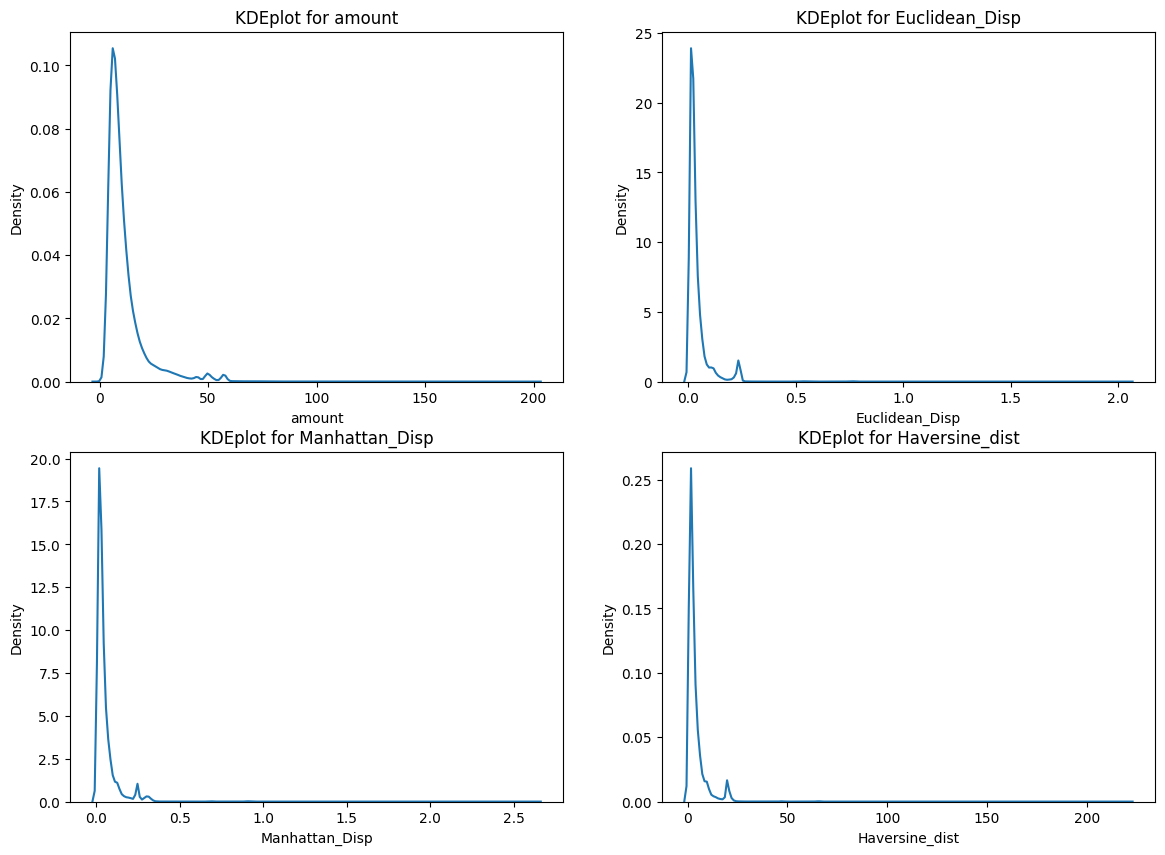

In [90]:
cols = num_cols
plt.figure(figsize=(14,10))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=df[cols[i]])
    plt.title(f'KDEplot for {cols[i]}')
plt.show()

#### Univariate - Countplot

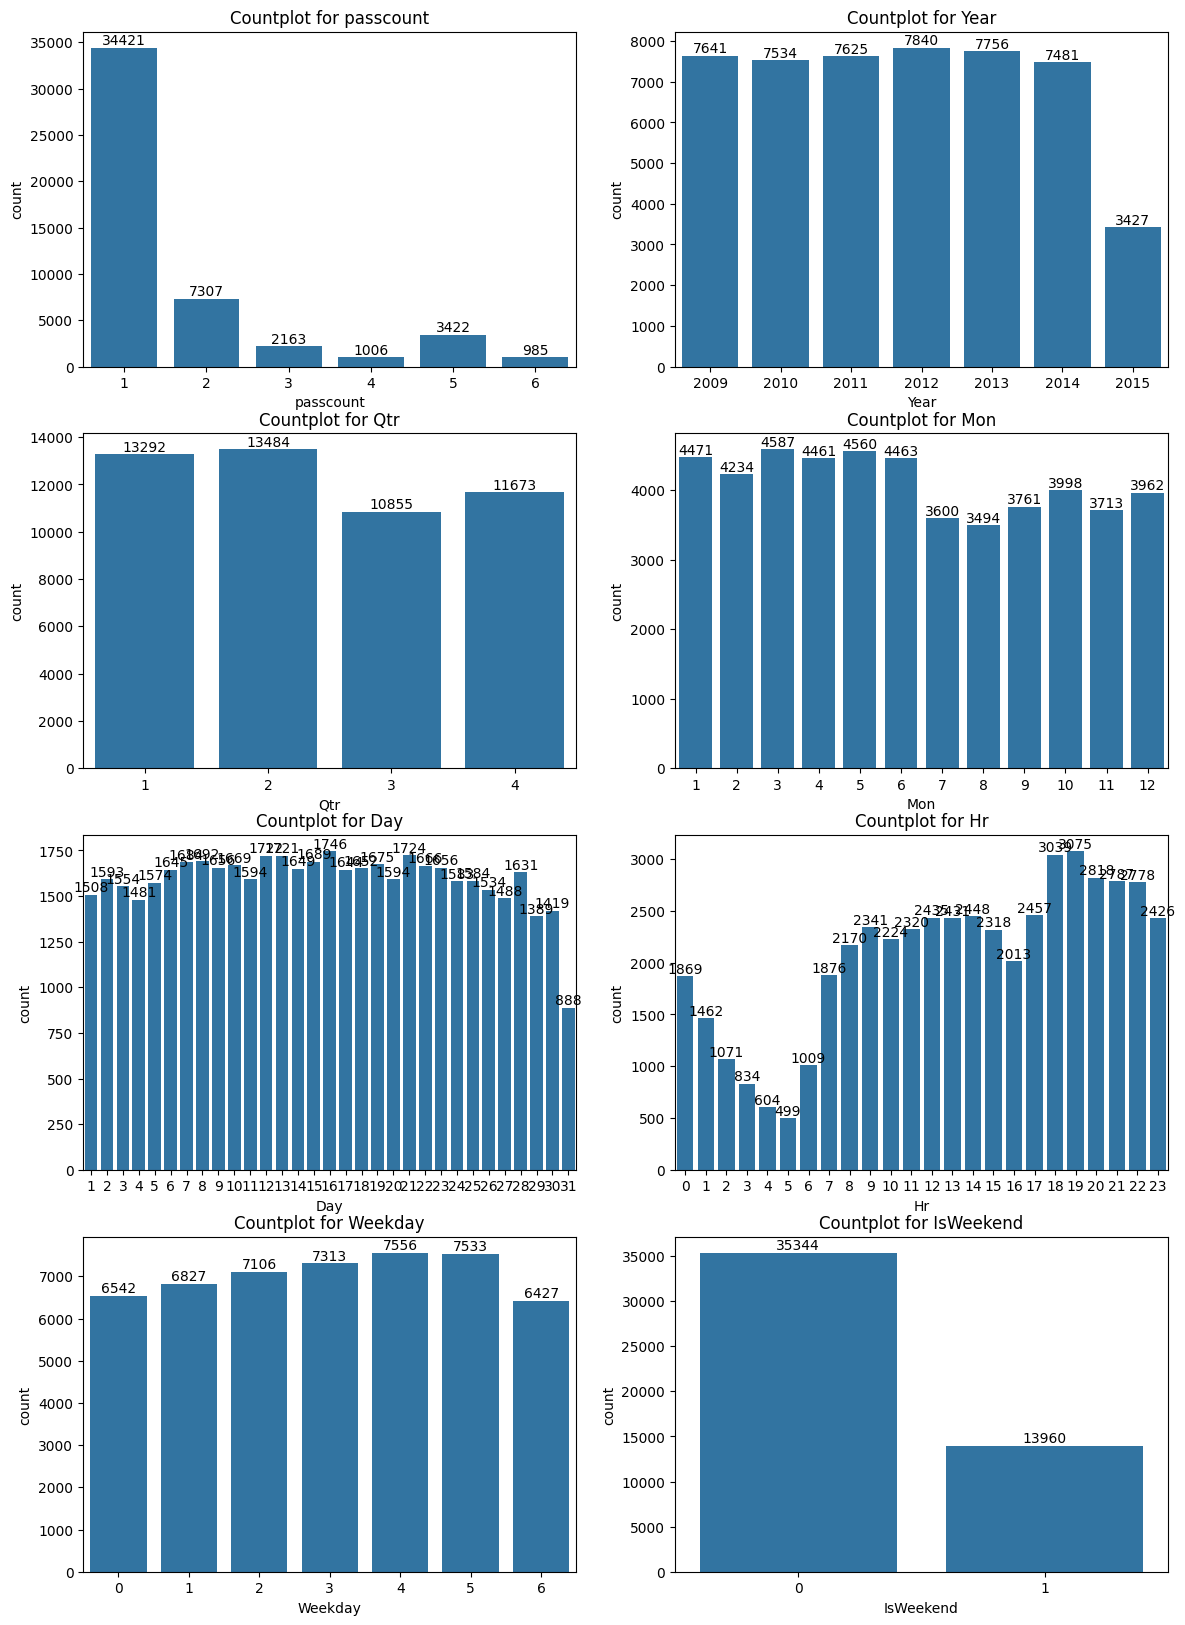

In [92]:
cols = cat_cols
plt.figure(figsize=(14,20))
for i in range(len(cols)):
    plt.subplot(4,2,i+1)
    ax = sns.countplot(x=df[cols[i]])
    ax.bar_label(ax.containers[0])
    plt.title(f'Countplot for {cols[i]}')
plt.show()

#### Inference
<pre>
1) Peak Hour
2) Majority ride boooking Qtr, Month
3) Busiest order booking weekday
4) Passcount freq

#### Bivariate - Cat - Num - BarChart

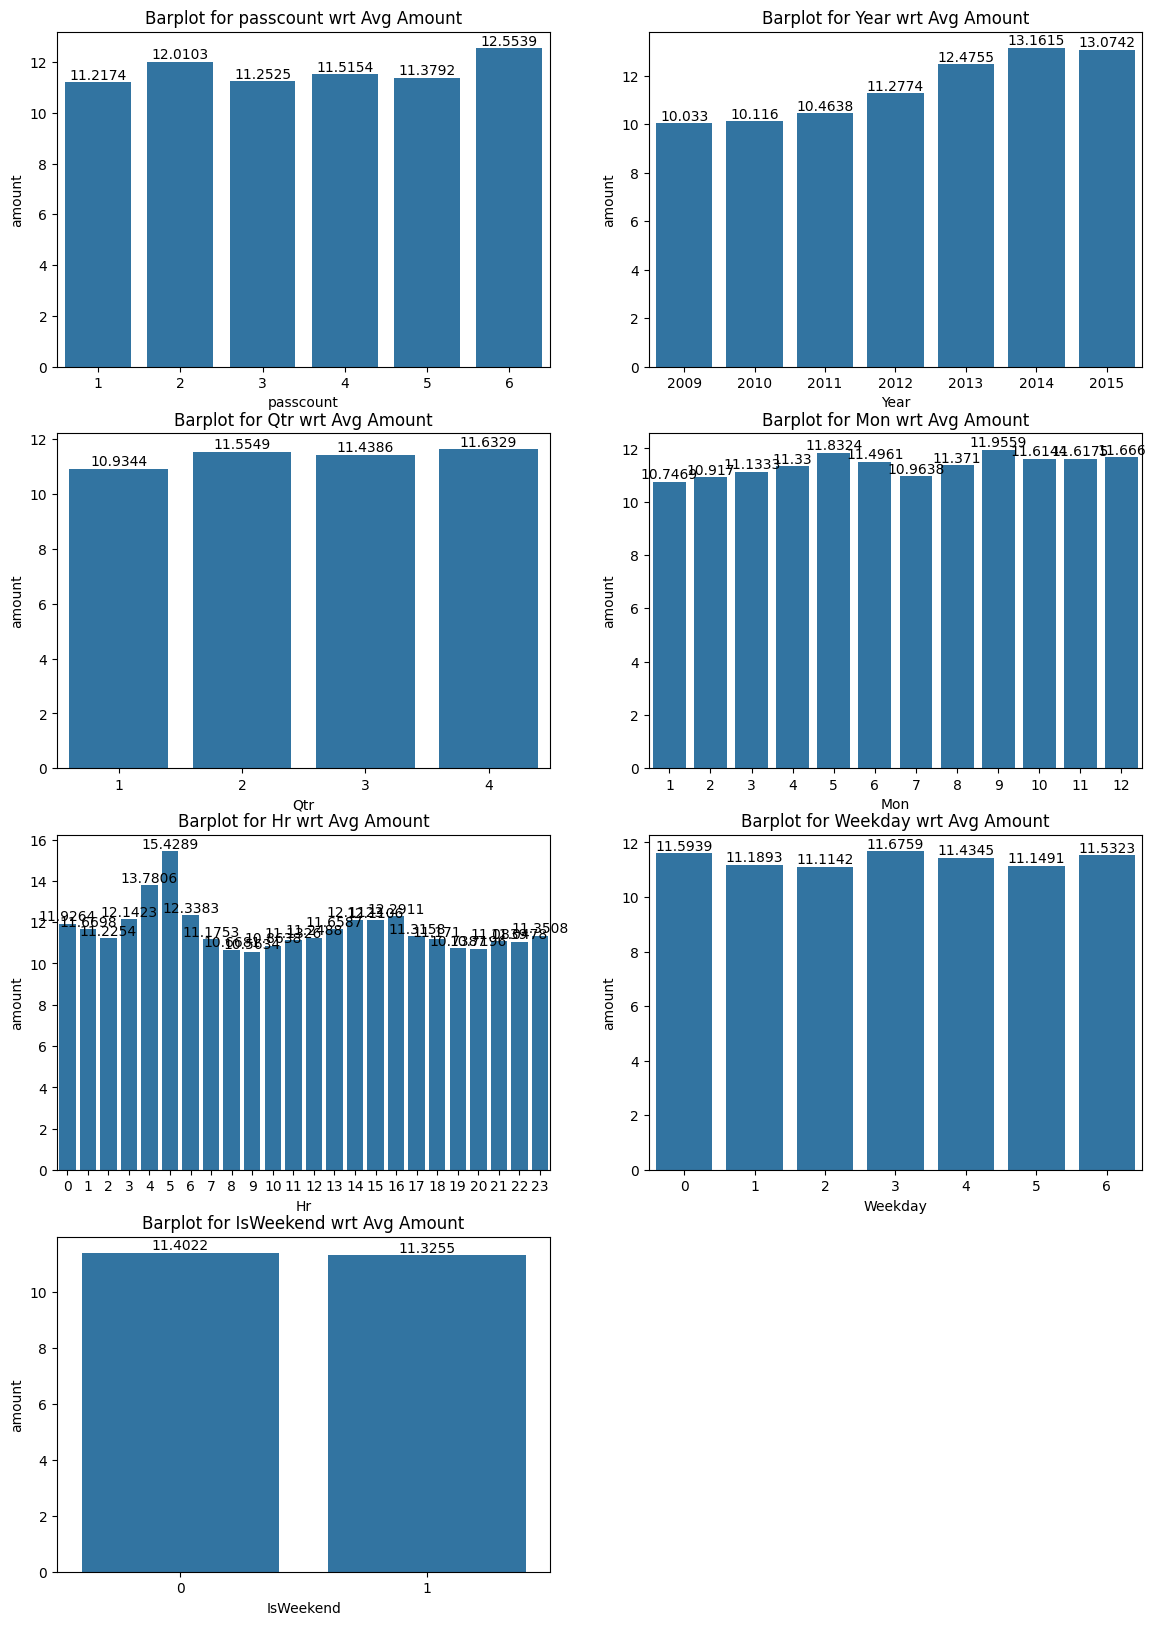

In [97]:
cat_cols
cols = ['passcount', 'Year', 'Qtr', 'Mon', 'Hr', 'Weekday', 'IsWeekend']

plt.figure(figsize=(14,20))
for i in range(len(cols)):
    plt.subplot(4,2,i+1)
    ax = sns.barplot(x=df[cols[i]],y=df['amount'],errorbar=('ci',0))
    ax.bar_label(ax.containers[0])
    plt.title(f'Barplot for {cols[i]} wrt Avg Amount')
plt.show()

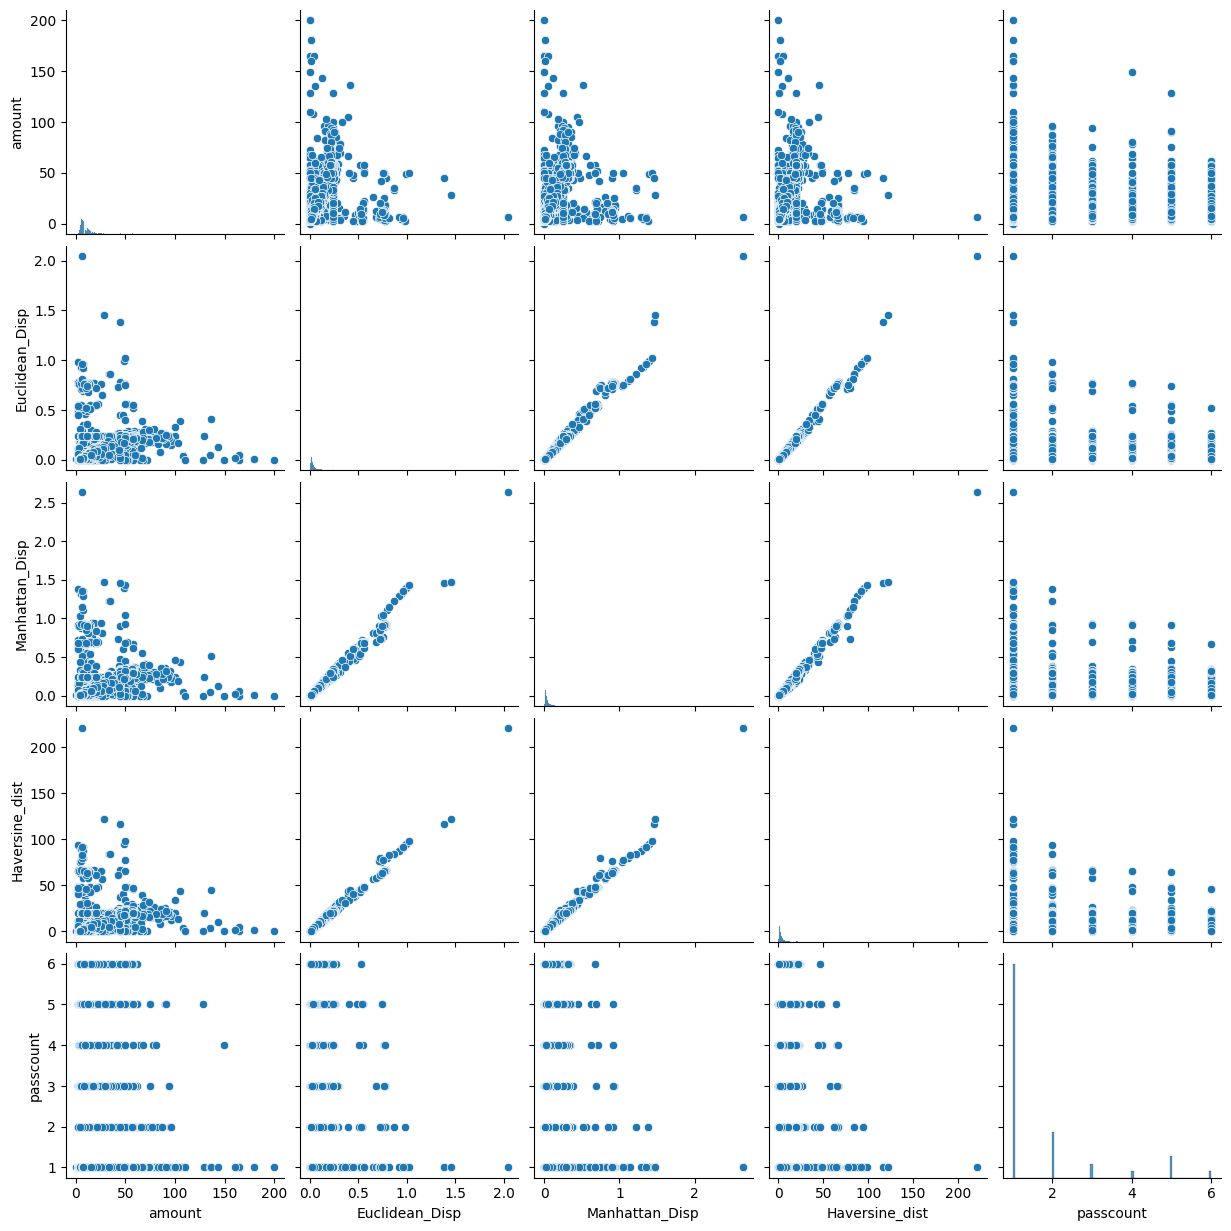

In [98]:
sns.pairplot(df,vars = num_cols+['passcount'])
plt.show()

### Corr

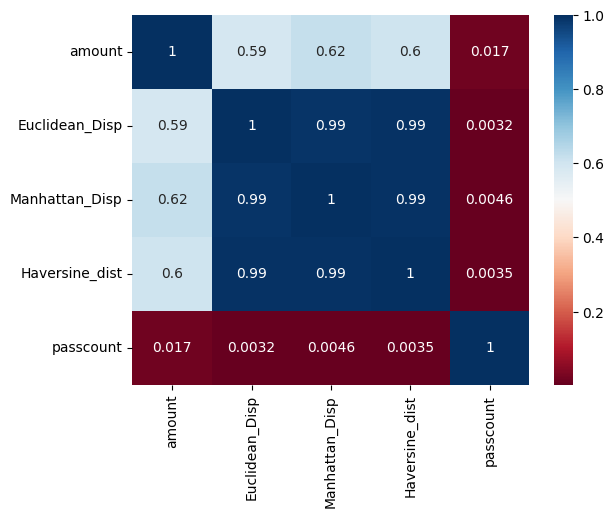

In [100]:
corr = df[num_cols+['passcount']].corr()

sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

#### Outlier Treatment

In [109]:
a1 = df[num_cols+['passcount']].describe(percentiles=[0.01,0.02,0.03,0.05,
                                        0.95,0.97,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
amount,1.000000e-02,3.300000,3.700000,3.700000,4.100000,8.500000,30.500000,38.100000,45.830000,52.000000,200.000000
Euclidean_Disp,1.000000e-06,0.002454,0.004232,0.005164,0.006377,0.022581,0.140839,0.226054,0.234668,0.234668,2.047435
Manhattan_Disp,1.000000e-06,0.003084,0.005288,0.006453,0.008005,0.029096,0.181261,0.245331,0.245331,0.305851,2.639094
Haversine_dist,8.446068e-05,0.244029,0.416273,0.508318,0.627953,2.235760,13.378191,19.856258,19.856258,20.767753,221.291823
passcount,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,6.000000,6.000000


In [108]:
print(df[df['amount']>52].shape)
print(df[df['Euclidean_Disp']>0.234668].shape)
print(df[df['Manhattan_Disp']>0.305851].shape)
print(df[df['Haversine_dist']>20.767753].shape)

(486, 19)
(1277, 19)
(494, 19)
(494, 19)


In [112]:
df4 = df.copy()

In [113]:
right_sk = num_cols
for i in right_sk:
    upper = df[i].quantile(0.99)
    df[i] = np.where(df[i]>upper,upper,df[i])

In [114]:
df['amount'] = np.where(df['amount']<3.300,3.300,df['amount'])

In [115]:
a1 = df[num_cols].describe(percentiles=[0.01,0.02,0.03,0.05,
                                        0.95,0.97,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
amount,3.300000e+00,3.300000,3.700000,3.700000,4.100000,8.500000,30.500000,38.100000,45.830000,52.000000,52.000000
Euclidean_Disp,1.000000e-06,0.002454,0.004232,0.005164,0.006377,0.022581,0.140839,0.226054,0.234668,0.234668,0.234668
Manhattan_Disp,1.000000e-06,0.003084,0.005288,0.006453,0.008005,0.029096,0.181261,0.245331,0.245331,0.305850,0.305851
Haversine_dist,8.446068e-05,0.244029,0.416273,0.508318,0.627953,2.235760,13.378191,19.856258,19.856258,20.767722,20.767753


#### Select x and y

In [116]:
df.columns

Index(['id', 'amount', 'dt', 'lon_pick', 'lat_pick', 'lon_drop', 'lat_drop',
       'passcount', 'Year', 'Qtr', 'Mon', 'Day', 'Hr', 'Weekday', 'DayName',
       'IsWeekend', 'Euclidean_Disp', 'Manhattan_Disp', 'Haversine_dist'],
      dtype='object')

In [117]:
x = df[['passcount', 'Year', 'Qtr', 'Mon', 'Day', 'Hr', 'Weekday',
       'IsWeekend', 'Euclidean_Disp', 'Manhattan_Disp', 'Haversine_dist']]
y = df['amount']
print(x.shape)
print(y.shape)

(49304, 11)
(49304,)


#### Split data into train and test

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,
                                                 random_state=42)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(34512, 11) (14792, 11)
(34512,) (14792,)


In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# model = Function(param)
# model.fit(x_train,y_train)
# model.predict(x_test)
# print(Train score)
# print(Test score)
# mae,mse,rmse,r2

In [125]:
from sklearn.metrics import *

In [141]:
def eval_model(model,x_train,x_test,y_train,y_test,mname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_scr = model.score(x_train,y_train) 
    test_scr = model.score(x_test,y_test)
    mae = mean_absolute_error(y_test,ypred)
    mse = mean_squared_error(y_test,ypred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,ypred)
    res_df = pd.DataFrame({'Train_Score':train_scr,'Test_Score':test_scr,
             'MAE':mae,'MSE':mse,'RMSE':rmse,'R2_score':r2},index=[mname])
    return res_df, ypred

#### 1) LinReg

In [142]:
lr1 = LinearRegression()
lr1_res,ypred_lr1 = eval_model(lr1,x_train,x_test,y_train,y_test,'LinReg')
lr1_res

,Train_Score,Test_Score,MAE,MSE,RMSE,R2_score
LinReg,0.625195,0.627105,3.11646,31.033404,5.570763,0.627105


#### 2) Decision Tree Reg

In [143]:
# criterion = squared_err
dt1 = DecisionTreeRegressor(max_depth=7,min_samples_split=10)
dt1_res,ypred_dt1 =  eval_model(dt1,x_train,x_test,y_train,y_test,'DT1')
dt1_res

,Train_Score,Test_Score,MAE,MSE,RMSE,R2_score
DT1,0.817238,0.793349,2.189473,17.198104,4.14706,0.793349


#### 3) Random Forest  Reg

In [144]:
# Base Model
rf1 = RandomForestRegressor()
rf1_res,ypred_rf1 = eval_model(rf1,x_train,x_test,y_train,y_test,'RF1')
rf1_res

,Train_Score,Test_Score,MAE,MSE,RMSE,R2_score
RF1,0.970445,0.804917,2.129476,16.235358,4.029312,0.804917


#### Feature Importance
<pre>

feat_imp = N_t / N * (impurity - N_t_R / N_t * right_impurity
                            - N_t_L / N_t * left_impurity)
                            
where N_t = number f smaples in current node                            
N_t_R = number of smaples in right child
N_t_L = number of smaples in left child

#### Drop InSignificant features

In [135]:
print(x.shape)
x = x.drop(['Qtr','IsWeekend'],axis=1)
x.shape

(49304, 11)


(49304, 9)

In [146]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.3,
                                                 random_state=42)

In [147]:
rf2 = RandomForestRegressor(n_estimators=85,max_depth=7,min_samples_split=10)
rf2_res, ypred_rf2 = eval_model(rf2,x_train1,x_test1,y_train1,y_test1,'RF2')
rf2_res

,Train_Score,Test_Score,MAE,MSE,RMSE,R2_score
RF2,0.826271,0.805474,2.144719,16.189004,4.023556,0.805474


In [149]:
all_res = pd.concat([lr1_res,dt1_res,rf1_res,rf2_res])
all_res

,Train_Score,Test_Score,MAE,MSE,RMSE,R2_score
LinReg,0.625195,0.627105,3.116460,31.033404,5.570763,0.627105
DT1,0.817238,0.793349,2.189473,17.198104,4.147060,0.793349
RF1,0.970445,0.804917,2.129476,16.235358,4.029312,0.804917
RF2,0.826271,0.805474,2.144719,16.189004,4.023556,0.805474


In [150]:
x_test1.head()

,passcount,Year,Mon,Day,Hr,Weekday,Euclidean_Disp,Manhattan_Disp,Haversine_dist
12890,5,2010,9,19,17,6,0.010611,0.011489,0.897284
21209,1,2015,2,5,4,3,0.008324,0.011471,0.771432
12155,5,2014,7,4,1,4,0.114031,0.132170,9.722928
49792,1,2009,8,16,11,6,0.026832,0.037256,2.512662
18109,1,2009,9,18,10,4,0.005255,0.005934,0.582559


In [154]:
compare_pred = pd.DataFrame({'Y_test':y_test1,'Ypred_RF2':ypred_rf2})
compare_pred.sample(20)

,Y_test,Ypred_RF2
35082,49.8,48.737213
7422,8.1,7.066582
29723,20.0,17.150502
27165,11.0,9.096695
13343,5.5,6.665411
31917,23.5,21.248490
31936,10.9,10.541101
47214,9.3,12.569706
39563,12.9,14.953427
12898,4.5,4.922380


#### Hyperparameter Tuning

In [155]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [158]:
hparams_rf = {'n_estimators':[75,80,85,90,95,100],
             'max_depth':[5,6,7,8,9,10],
             'min_samples_split':[6,8,10,12]}

print(6*6*4)
print(x_train1.shape)

144
(34512, 9)


####  RandomizedSearchCV

In [159]:
rf_base = RandomForestRegressor()

rs = RandomizedSearchCV(estimator=rf_base, param_distributions=hparams_rf,
                       scoring='neg_mean_squared_error',cv=5)
rs.fit(x_train1,y_train1)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 6, 7, 8, 9, 10],
                                        'min_samples_split': [6, 8, 10, 12],
                                        'n_estimators': [75, 80, 85, 90, 95,
                                                         100]},
                   scoring='neg_mean_squared_error')

In [160]:
print(rs.best_score_)
print(rs.best_params_)

# MSE  minimize

-16.013705636533953
{'n_estimators': 85, 'min_samples_split': 12, 'max_depth': 9}


#### Model Saving

In [ ]:
# Model saving using joblib
import pickle, joblib